# Práctica 1. Parte 1. Clasificador lineal

**1. Enunciado**

Desde el análisis de varias muestras de pizarra se infiere que el material se puede clasificar en dos categorías P1 y P2 desde la medición de tres variables (*x*<sub>1</sub>, *x*<sub>2</sub>, *x*<sub>3</sub>). El equipo de ingenieros y y científicos propone entrenar un perceptrón para formar la clasificación de forma automatizada.

Utilizando la regla de aprendizaje de Hebb dada por

<center>
<bold>w</bold>(n + 1) = <bold>w</bold>(n) + (d<sup>(k)</sup> − y) <bold>x</bold><sup>(k)</sup>
</center>

donde *y* = *σ* (*u*) siendo *u* = **w** ·**x**. Considerando una constante de aprendizaje *η* = 0.01 se pide



1. Ejecutar cinco series de entrenamientos del perceptrón inicializando los pesos {**w**} con valores aleatorios (inicializando para cada sesión de entrenamiento si necesario). Los datos de entrenamiento se pueden des- cargar de la página del curso
1. escribir los resultados del entrenamiento en una tabla donde se representen los valores de los pesos iniciales y finales para cada una de la sesiones de entrenamiento
1. Después de haber entrenado el perceptrón clasificar los datos de la table 1 [indicando](#_page0_x39.69_y395.45) la clase para cada entrada obtenida para las 5 sesiones.
1. explicar<a name="_page0_x39.69_y395.45"></a> por qué el número de épocas de entrenamiento varía cada vez que el perceptrón se entrena![](Aspose.Words.042e48d0-77f1-4987-9024-4b991db45e47.002.png)


|Sample|*x*<sub>1</sub>|*x*<sub>2</sub>|*x*<sub>3</sub>|*y* (T1)|*y* (T2)|*y* (T3)|*y* (T4)|*y* (T5)|
| - | - | - | - | - | - | - | - | - |
|1|-0.3665|0\.0620|5\.9891||||||
|2|-0.7842|1\.1267|5\.5912||||||
|3|0\.3012|0\.5611|5\.8234||||||
|4|0\.7757|1\.0648|8\.0677||||||
|5|0\.1570|0\.8028|6\.3040||||||

In [1]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
from math import inf
from ipywidgets import interactive

In [2]:
# Datos de entrenamiento:
train = np.array(
    [
        [
            -0.6508,
            -1.4492,
            2.0850,
            0.2626,
            0.6418,
            0.2569,
            1.1155,
            0.0914,
            0.0121,
            -0.0429,
            0.4340,
            0.2735,
            00.4839,
            0.4089,
            1.4391,
            -0.9115,
            0.3654,
            0.2144,
            0.2013,
            0.6483,
            -0.1147,
            -0.7970,
            -1.0625,
            0.5307,
            -1.2200,
            0.3957,
            -0.1013,
            2.4482,
            2.0149,
            0.2012,
        ],
        [
            0.1097,
            0.8896,
            0.6876,
            1.1476,
            1.0234,
            0.6730,
            0.6043,
            0.3399,
            0.5256,
            0.4660,
            0.6870,
            1.0287,
            0.4851,
            -0.1267,
            0.1614,
            -0.1973,
            1.0475,
            0.7515,
            1.0014,
            0.2183,
            0.2242,
            0.8795,
            0.6366,
            0.1285,
            0.7777,
            0.1076,
            0.5989,
            0.9455,
            0.6192,
            0.2611,
        ],
        [
            4.0009,
            4.4005,
            12.0710,
            7.7985,
            7.0427,
            8.3265,
            7.4446,
            7.0677,
            4.6316,
            5.4323,
            8.2287,
            7.1934,
            7.4850,
            5.5019,
            8.5843,
            2.1962,
            7.4858,
            7.1699,
            6.5489,
            5.8991,
            7.2435,
            3.8762,
            2.4707,
            5.6883,
            1.7252,
            5.6623,
            7.1812,
            11.2095,
            10.9263,
            5.4631,
        ],
        [
            -1,
            -1,
            -1,
            1,
            1,
            -1,
            1,
            -1,
            1,
            1,
            -1,
            1,
            -1,
            -1,
            -1,
            -1,
            1,
            1,
            1,
            1,
            -1,
            1,
            1,
            1,
            1,
            -1,
            -1,
            1,
            -1,
            1,
        ],
    ]
)


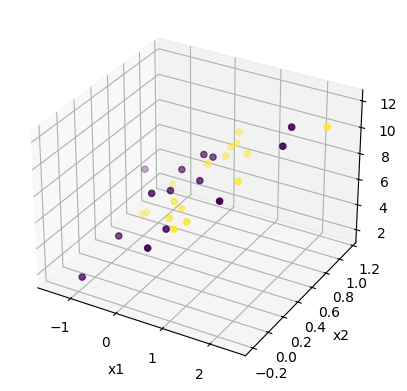

In [3]:
# Representación gráfica tridimensional de los datos de entrenamiento
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(train[0], train[1], train[2], c=train[3])
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
plt.show()

In [4]:
# Función de activación:
def escalon(x: np.ndarray, w: np.ndarray):
    '''Devuelve un vector con las salidas de la función escalón para cada entrada de x y el vector de pesos w.'''
    return np.where(np.dot(x, w) >= 0, 1, -1)

In [5]:
# Función de ejecución con perceptrón
def entrenar_perceptron()-> np.ndarray:
    '''Enterna un perceptron con los datos previamente definidos.
    Devuelve (pesos_iniciales, pesos, error cuadrático medio a lo largo de las ejecuciones, iteraciones realizadas)'''
    max_iter = 5000
    max_error = 0.0001
    mu = 0.01
    
    x = np.transpose(train[:3])
    x = np.insert(x, 0, 1, axis=1) # Añadimos un 1 a las x como x0
    d = np.transpose(train[3])
    
    w = -50 + np.random.rand(4) * 100 # Inicialización aleatoria de los pesos entre -50 y 50
    w_inicial = w.copy()
    
    iteracion = 0
    error = inf
    errores = []
    
    while iteracion < max_iter and error > max_error:
        y_hat = escalon(x, w)
        error_actual = d - y_hat
        
        # Actualización de pesos
        w = w + mu * np.dot(error_actual, x)
        
        # Calculamos el error cuadrático medio
        error = np.mean(np.square(error_actual))
        errores.append(error)
        
        iteracion += 1
        
    
    
    return w_inicial, w, errores, iteracion

In [6]:
# Entrenamos 5 veces el perceptrón
print("Pesos iniciales\t\t\t\t\tPesos finales\t\t\t\t\t\t\tErrores\t\tIteraciones")
lista_errores = []
pesos_finales = []

for i in range(5):
    w_inicial, w_final, errores, iteraciones = entrenar_perceptron()
    print(f"{w_inicial}\t{w_final}\t{errores[-1]:.5}\t\t{iteraciones}")
    lista_errores.append(errores)
    pesos_finales.append(w_final)

Pesos iniciales					Pesos finales							Errores		Iteraciones
[ 44.52540635 -20.89544799  -2.95298176  12.8936562 ]	[24.26540635 10.97108401 15.72932024 -5.3562058 ]	0.0		730
[ 12.44186998 -29.70143687 -31.23537584  -0.32202333]	[17.68186998  8.56506713 13.72540216 -4.07651933]	0.0		1769
[-16.76199868 -34.9896255   47.51292251  19.13599657]	[17.73800132  8.7234225  14.15790451 -4.12296343]	0.0		2375
[  7.51319011   8.95092281 -26.54149153  40.88950632]	[17.69319011  8.71996081 14.18767247 -4.11854568]	0.0		1514
[-43.5539279   19.29638666 -47.27282554  46.70020618]	[17.9060721   8.72028666 14.09481046 -4.05247182]	0.0		2705


In [11]:
def representar(elev=28, azim=45):
    # Representación gráfica tridimensional de los clasificadores con los puntos de entrenamiento
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(train[0], train[1], train[2], c=train[3])
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")

    # Representación de los planos de clasificación
    for w in pesos_finales:
        x = np.linspace(-2, 2, 100)
        y = np.linspace(-2, 2, 100)
        x, y = np.meshgrid(x, y)
        z = (-w[0] - w[1] * x - w[2] * y) / w[3]
        ax.plot_surface(x, y, z, alpha=0.5)
        
    ax.view_init(elev=elev, azim=azim)        
    plt.show()
interactive_plot = interactive(representar, elev=(0, 90), azim=(0, 360))
interactive_plot

interactive(children=(IntSlider(value=28, description='elev', max=90), IntSlider(value=45, description='azim',…

Respuesta al punto 4:

<span style="color: DodgerBlue;">Podemos observar que las iteraciones son siempre inferiores al límite superior establecido (5 000) y además son distintas entre sí.
Esto se debe a la inicialización aleatoria y a que no encuentra una sola solución al problema (vemos que los valores de los pesos son distintos entre sí), sino que logra encontrar una que clasifica correctamente el conjunto de entrenamiento.</span>

In [8]:
# Calculamos valores para rellenar la tabla:

test = np.array(
    [
        [1, -0.3665, 0.0620, 5.9891],
        [1, -0.7842, 1.1267, 5.5912],
        [1, 0.3012, 0.5611, 5.8234],
        [1, 0.7757, 1.0648, 8.0677],
        [1, 0.1570, 0.8028, 6.3040],
    ]
) # Añadimos ya el 1 para poder hacer el cálculo de la salida matricialmente
print("-"*145)
print("|     Sample\t|\tx1\t|\tx2\t|\tx3\t|\ty(T1)\t|\ty(T2)\t|\ty(T3)\t|\ty(T4)\t|\ty(T5)\t|")
print("-"*145)

for i in range(5):
    print(f"|\t{i+1}\t|\t{test[i][1]:.4f}\t|\t{test[i][2]:.4f}\t|\t{test[i][3]:.4f}\t|\t{escalon(test[i], pesos_finales[0])}\t|\t{escalon(test[i], pesos_finales[1])}\t|\t{escalon(test[i], pesos_finales[2])}\t|\t{escalon(test[i], pesos_finales[3])}\t|\t{escalon(test[i], pesos_finales[4])}\t|")
print("-"*145)

-------------------------------------------------------------------------------------------------------------------------------------------------
|     Sample	|	x1	|	x2	|	x3	|	y(T1)	|	y(T2)	|	y(T3)	|	y(T4)	|	y(T5)	|
-------------------------------------------------------------------------------------------------------------------------------------------------
|	1	|	-0.3665	|	0.0620	|	5.9891	|	-1	|	-1	|	-1	|	-1	|	-1	|
|	2	|	-0.7842	|	1.1267	|	5.5912	|	1	|	1	|	1	|	1	|	1	|
|	3	|	0.3012	|	0.5611	|	5.8234	|	1	|	1	|	1	|	1	|	1	|
|	4	|	0.7757	|	1.0648	|	8.0677	|	1	|	1	|	1	|	1	|	1	|
|	5	|	0.1570	|	0.8028	|	6.3040	|	1	|	1	|	1	|	1	|	1	|
-------------------------------------------------------------------------------------------------------------------------------------------------
